In [19]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier #used
import matplotlib.pyplot as plt #used
import numpy as np #used
from sklearn.preprocessing import StandardScaler #used
from sklearn.metrics import accuracy_score #used
from sklearn.metrics import confusion_matrix #used
import seaborn as sns #used
from sklearn.model_selection import train_test_split

In [15]:
df  =pd.read_csv(r"C:\Users\rida\Downloads\archive\pima-indians-diabetes.csv", delimiter=",")
df

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Output
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
df.shape

(767, 9)

In [25]:
X=df.drop(['Feature3','Feature4','Feature5','Feature6','Feature7','Feature8','Output'],axis='columns')

In [26]:
X

,Feature1,Feature2
0,6,148
1,1,85
2,8,183
3,1,89
4,0,137
...,...,...
763,10,101
764,2,122
765,5,121
766,1,126


In [28]:
y = df['Output']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Output, Length: 768, dtype: int64

In [33]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [39]:
y_test

661    1
122    0
113    0
14     1
529    0
      ..
476    1
482    0
230    1
527    0
380    0
Name: Output, Length: 154, dtype: int64

In [40]:
knn =KNeighborsClassifier(n_neighbors=3) # by default meterics is minkowski which means that it uses Eucelidian distance 
#and the synatx is "class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)[source]
#"
knn.fit(x_train,y_train)



KNeighborsClassifier(n_neighbors=3)

In [42]:
y_pred =knn.predict(x_test)
accuracy_score(y_test,y_pred)


0.7337662337662337

In [43]:
scores = []
for i in range (1,35):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    scores.append(accuracy_score(y_test,y_pred))
    


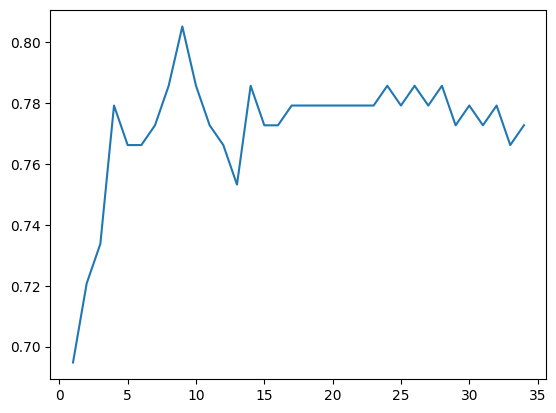

In [45]:
plt.plot(range(1,35),scores)

(array([[1., 0., 1., 1., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 2., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 2., 1.],
        [0., 0., 0., 0., 0., 1., 1., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 3., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 3., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 3., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 2., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 2., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1., 3., 0., 0.]]),
 array([ 1. ,  4.3,  7.6, 10.9, 14.2, 17.5, 20.8, 24.1, 27.4, 30.7, 34. ]),
 array([0.69480519, 0.70584416, 0.71688312, 0.72792208, 0.73896104,
        0.75      , 0.76103896, 0.77207792, 0.78311688, 0.79415584,
        0.80519481]),
 <matplotlib.collections.QuadMesh at 0x1db9b42e1d0>)

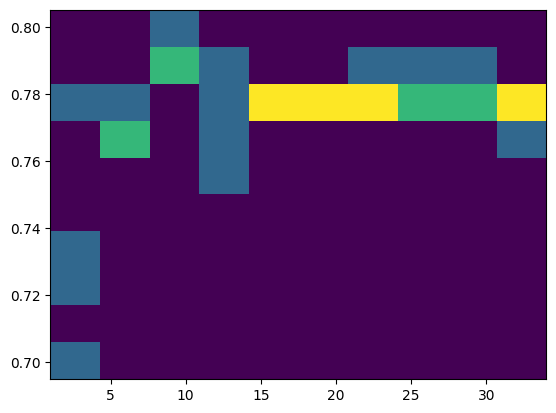

In [46]:
plt.hist2d(range(1,35),scores)

In [54]:
z= confusion_matrix(y_test,y_pred)
z

array([[96, 11],
       [24, 23]], dtype=int64)

<Axes: >

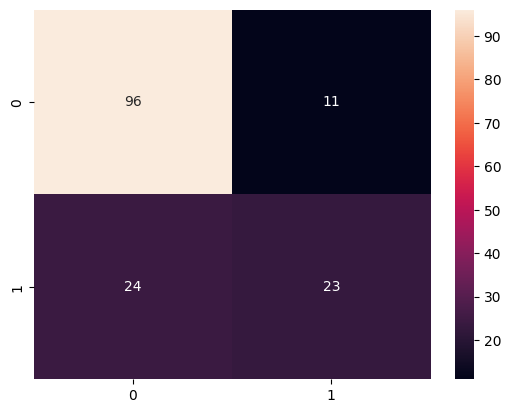

In [48]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

In [56]:
TN = z[0,0]
FP =z[0,1]
FN= z[1,0]
TP =z[1,1]

In [58]:
Accuracy = (TP+TN)/(TP+FP+TN+FN)
Accuracy

0.7727272727272727

In [60]:
Precision = TP/(TP+FP)
Precision

0.6764705882352942

In [62]:
Recall = TP/(TP+FN)
Recall

0.48936170212765956

In [63]:
F1Score = (2*TP)/((2*TP)+FP+FN)
F1Score

0.5679012345679012